In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from time import time

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
68931,Female,10.0,0,0,never,25.30,3.5,160,0
83875,Female,64.0,0,0,never,27.32,6.6,100,0
10042,Female,52.0,0,0,never,27.32,8.8,159,1
17032,Female,60.0,0,0,ever,42.38,4.8,160,0
82625,Male,17.0,0,0,No Info,27.32,4.5,200,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.duplicated().sum()

3854

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.describe(include='object')

,gender,smoking_history
count,96146,96146
unique,3,6
top,Female,never
freq,56161,34398


In [8]:
df.smoking_history.value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [9]:
def correctSmoke(val):
    if val == 'never':
        return 'not smoker'
    elif val == 'current':
        return 'current smoker'
    elif val == 'No Info':
        return 'no info'
    else:
        return 'former smoker'
    
df.smoking_history = df.smoking_history.apply(correctSmoke)
df.smoking_history.value_counts()

smoking_history
not smoker        34398
no info           32887
former smoker     19664
current smoker     9197
Name: count, dtype: int64

In [10]:
df.gender.value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [11]:
df = df.query("gender != 'Other'")

In [12]:
for column in df.columns:
    if df[column].nunique() < 5:
        df[column] = df[column].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               96128 non-null  category
 1   age                  96128 non-null  float64 
 2   hypertension         96128 non-null  category
 3   heart_disease        96128 non-null  category
 4   smoking_history      96128 non-null  category
 5   bmi                  96128 non-null  float64 
 6   HbA1c_level          96128 non-null  float64 
 7   blood_glucose_level  96128 non-null  int64   
 8   diabetes             96128 non-null  category
dtypes: category(5), float64(3), int64(1)
memory usage: 4.1 MB


In [14]:
numeric = df.select_dtypes(exclude=['category']).columns
categorical = df.select_dtypes(include=['category']).columns.drop('diabetes')

In [15]:
target = df['diabetes'].value_counts()

fig = px.pie(values=target.values, names=target.index, 
             title='<b>Distribution of Target Variable<b>', hole=0.4)

fig.update_traces(textposition='inside', textinfo='percent+label+value',sort=False)

fig.update_layout(title_x=0.5,showlegend=False,width=600,height=600, title_font=dict(size=24,color='black'))

fig.show()

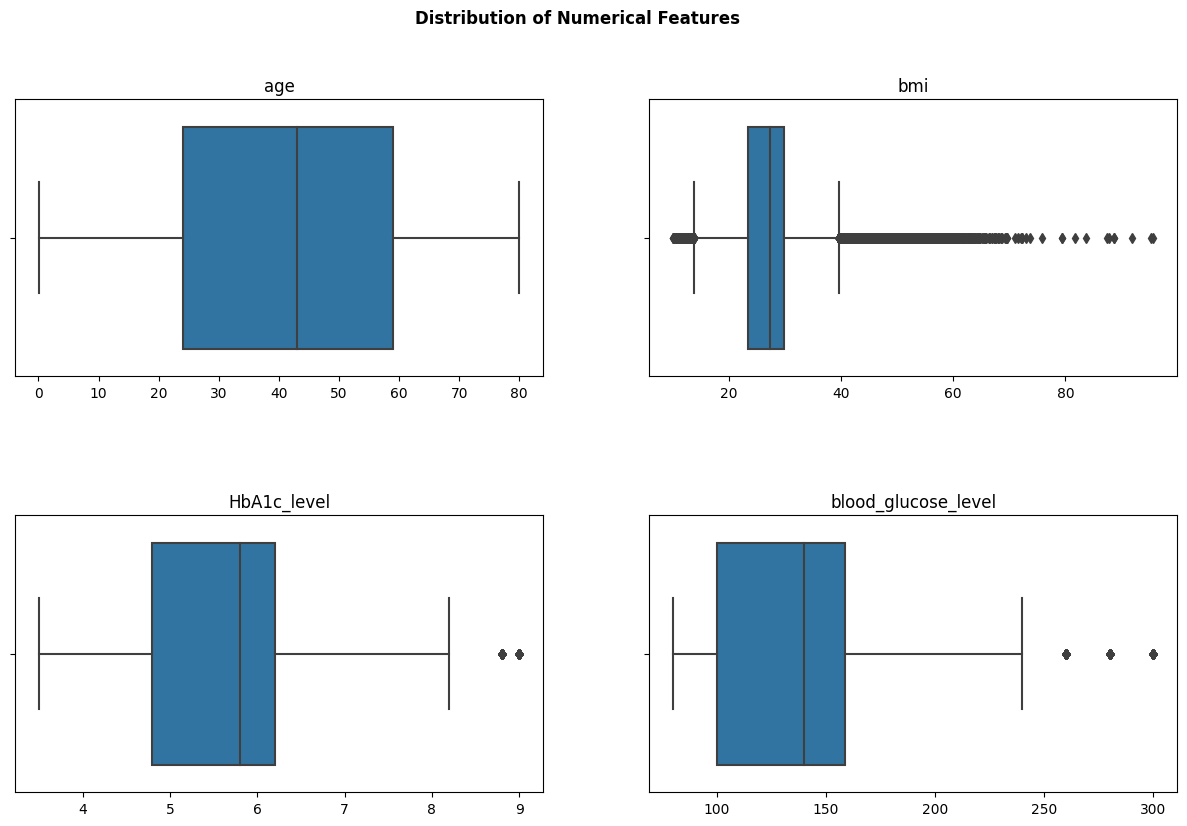

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
for i in range(2):
    for j in range(2):
        col = (i*2)+j
        sns.boxplot(x=df[numeric[col]], ax=ax[i, j])
        ax[i, j].set_xlabel('')
        if j > 0:
            ax[i, j].set_ylabel('')
        ax[i, j].set_title(numeric[col])
fig.suptitle("Distribution of Numerical Features",fontweight='bold')
fig.subplots_adjust(hspace=0.5)
plt.show()

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}],
                                           [{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=[f"{cat}" for cat in categorical])

for i in range(2):
    for j in range(2):
        col = (i * 2) + j

        target = df[categorical[col]].value_counts().sort_values(ascending=False)

        chart = go.Pie(labels=target.index, values=target.values, )

        fig.add_trace(chart, row=i + 1, col=j + 1)

fig.update_layout(height=800, width=1250, title='<b>Distribution of Categorical Variables<b>',
                  title_x=0.5, showlegend=False, title_font=dict(size=24, color='black'))

fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()


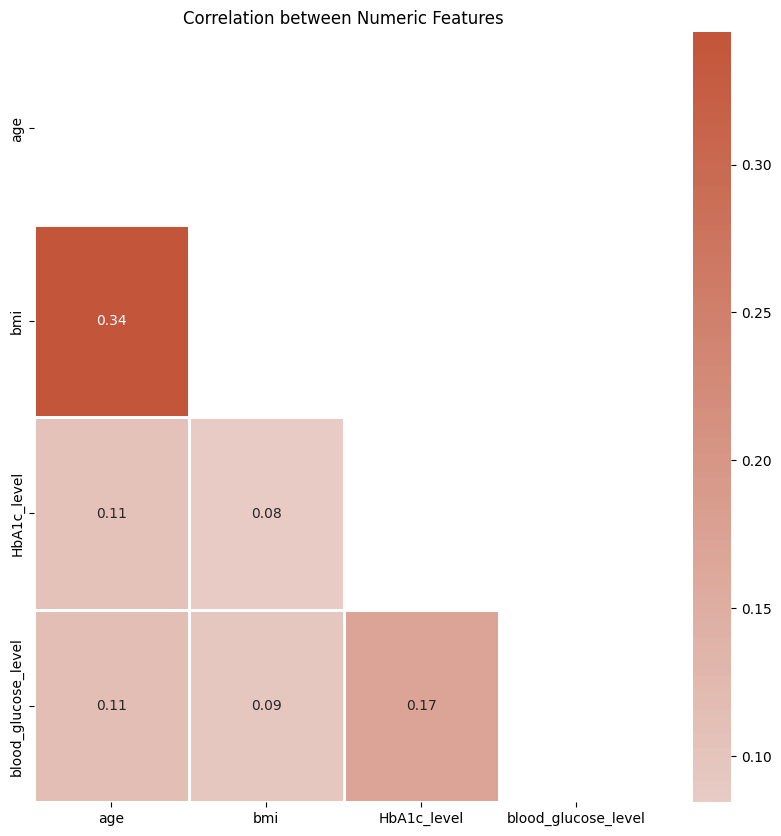

In [18]:
corr = df.corr(numeric_only=True)
mask = np.triu(corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(10, 10))
g=sns.heatmap(corr, mask=mask, cmap=cmap,center=0,
              annot=True,linewidths=2,fmt='.2f')
g.set_title("Correlation between Numeric Features")
plt.show()

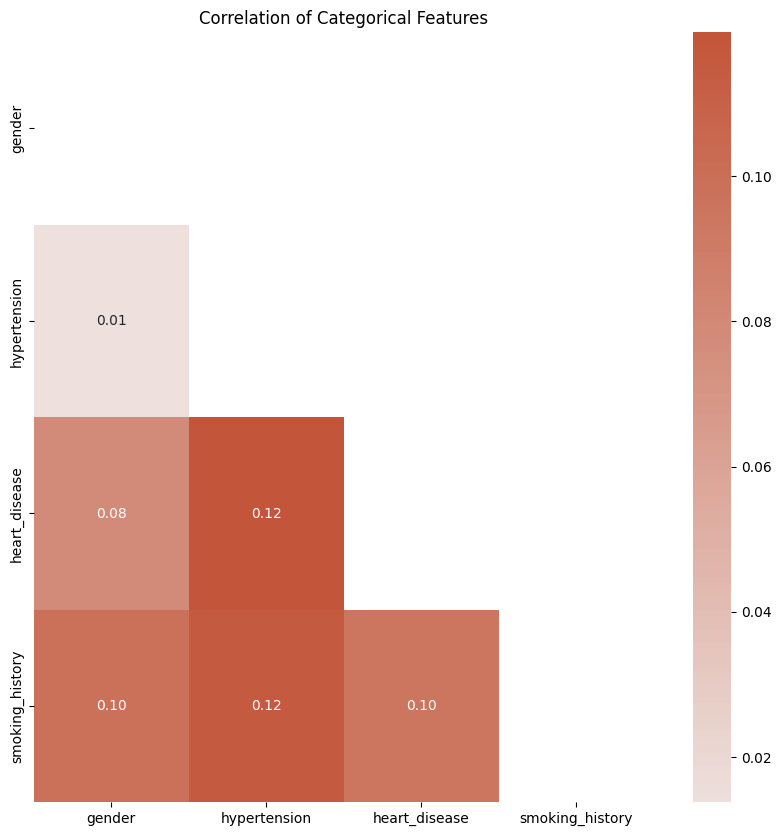

In [19]:
from scipy.stats import chi2_contingency

def cramerV(label,x):
    contingencyMatrix = pd.crosstab(label, x)
    chi2Statistic = chi2_contingency(contingencyMatrix)[0]
    totalEntries = contingencyMatrix.sum().sum()
    numRows, numCols = contingencyMatrix.shape
    phi2 = chi2Statistic / totalEntries
    phi2Corrected = max(0, phi2 - ((numCols - 1) * (numRows - 1)) / (totalEntries - 1))
    numRowsCorrected = numRows - ((numRows - 1) ** 2) / (totalEntries - 1)
    numColsCorrected = numCols - ((numCols - 1) ** 2) / (totalEntries - 1)

    if min((numColsCorrected - 1), (numRowsCorrected - 1)) == 0:
        v = 0
    else:
        v = np.sqrt(phi2Corrected / min((numColsCorrected - 1), (numRowsCorrected - 1)))
    
    return v


def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        temp = {}
        columns = df.columns
        for j in range(0,len(columns)):
            v = cramerV(df[column_of_interest],df[columns[j]])
            cramer.loc[column_of_interest,columns[j]] = v
            if (column_of_interest==columns[j]):
                pass
            else:
                temp[columns[j]] = v
        cramer.fillna(value=np.nan,inplace=True)
    plt.figure(figsize=(10,10))
    mask = np.triu(np.ones_like(cramer, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(cramer,annot=True,
            cmap=cmap,mask=mask ,fmt='.2f',center=0)

    plt.title("Correlation of Categorical Features")
    plt.show()
       
plot_cramer(df[categorical])

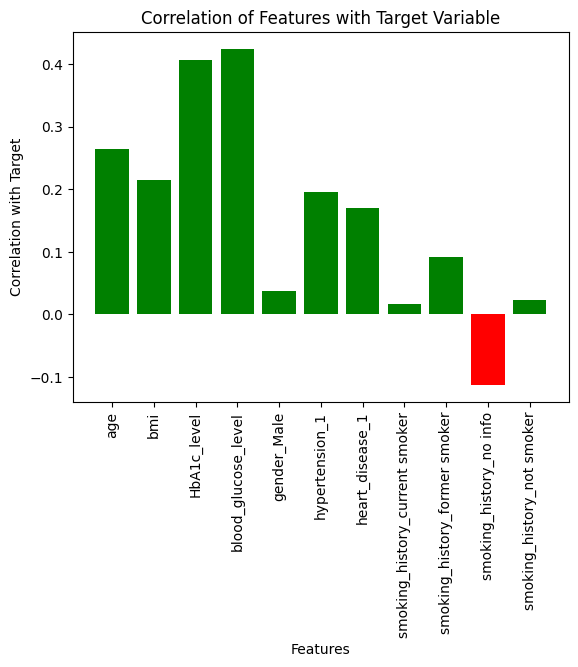

In [20]:
dfcol = df.copy()

categoricalBinary = categorical.drop('smoking_history')
dfcol = pd.get_dummies(dfcol, columns=categoricalBinary, drop_first=True)

dfcol = pd.get_dummies(dfcol, columns=['smoking_history'])

#dfcol = pd.get_dummies(dfcol, columns=categorical)

corr = dfcol.corr()['diabetes'].drop('diabetes')

colors = ['green' if corr >= 0 else 'red' for corr in corr.values]

plt.bar(corr.index, corr.values, color=colors)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation=90)
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

In [22]:
params = {
    LogisticRegression(): {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    GaussianNB(): {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]},
    DecisionTreeClassifier(): {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    RandomForestClassifier(): {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
    },
    XGBClassifier(): {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    KNeighborsClassifier(): {
        'n_neighbors': [3, 5, 7,9,11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

In [23]:
samples0=df.query('diabetes == 0').sample(5000,random_state=42)
samples1=df.query('diabetes == 1').sample(5000,random_state=42)

samples=pd.concat([samples0, samples1], ignore_index=True)

x=samples.drop('diabetes',axis=1)

y=samples['diabetes']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, shuffle=True,stratify=y,test_size=0.2,random_state=42)

numericTransformer = Pipeline(steps=[('scaler', StandardScaler())])
categoricalTransformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numericTransformer, numeric),('cat', categoricalTransformer, categorical)])

results =[]

/tmp/ipykernel_85/1180855749.py:1: RuntimeWarning:

Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.

/tmp/ipykernel_85/1180855749.py:2: RuntimeWarning:

Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.



In [24]:
for classifier, param in params.items():
    gridSearch = GridSearchCV(classifier, param, cv=5,n_jobs=-1)

    pipe=Pipeline([('preprocessor', preprocessor),('model',gridSearch)])

    start_time = time()
    pipe.fit(xTrain,yTrain)
    end_time = time() 

    y_pred = pipe.predict(xTest)

    accuracy = accuracy_score(yTest, y_pred)
    recall = recall_score(yTest, y_pred)
    precision = precision_score(yTest, y_pred)
    f1 = f1_score(yTest, y_pred)
    training_time = end_time - start_time
    tn, fp, fn, tp = confusion_matrix(yTest, y_pred).ravel()
    
    specificity = tn / (tn + fp)
    npv = tn / (tn + fn)
    results.append({'Classifier': str(classifier).split('(')[0],
                    'Best_Params': str(pipe.named_steps['model'].best_params_),
                    'Accuracy': accuracy,
                    'F1_Score': f1,
                    'Recall': recall,
                    'Precision': precision,
                    'Specificity':specificity,
                    'NPV':npv,
                    'Training_Time': training_time,})
    
    print(f"finished {classifier}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

finished LogisticRegression()
finished GaussianNB()
finished DecisionTreeClassifier()
finished RandomForestClassifier()
finished XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
finished KNeighborsClassifier()


In [25]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
xTrainScaled = preprocessor.fit_transform(xTrain)
xTestScaled = preprocessor.transform(xTest)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(xTrainScaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
early = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [30]:
start_time = time()
history=model.fit(xTrainScaled,yTrain,epochs=100,validation_split=0.1,callbacks=[early])
end_time = time() 

Epoch 1/100
225/225 [==============================] - 2s 3ms/step - loss: 0.3141 - accuracy: 0.8581 - val_loss: 0.2785 - val_accuracy: 0.8612
Epoch 2/100
225/225 [==============================] - 1s 2ms/step - loss: 0.2462 - accuracy: 0.8867 - val_loss: 0.2759 - val_accuracy: 0.8650
Epoch 3/100
225/225 [==============================] - 1s 2ms/step - loss: 0.2403 - accuracy: 0.8881 - val_loss: 0.2814 - val_accuracy: 0.8700
Epoch 4/100
225/225 [==============================] - 1s 2ms/step - loss: 0.2308 - accuracy: 0.8929 - val_loss: 0.2578 - val_accuracy: 0.8737
Epoch 5/100
225/225 [==============================] - 1s 2ms/step - loss: 0.2222 - accuracy: 0.8983 - val_loss: 0.2459 - val_accuracy: 0.8788
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.2123 - accuracy: 0.9006 - val_loss: 0.2418 - val_accuracy: 0.8788
Epoch 7/100
225/225 [==============================] - 1s 2ms/step - loss: 0.2043 - accuracy: 0.9028 - val_loss: 0.2363 - val_accuracy: 0.8813

In [31]:
eval=model.evaluate(xTestScaled,yTest)

63/63 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9055


In [32]:
y_pred = model.predict(xTestScaled)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(yTest, y_pred)
recall = recall_score(yTest, y_pred)
precision = precision_score(yTest, y_pred)
f1 = f1_score(yTest, y_pred)
training_time = end_time - start_time

tn, fp, fn, tp = confusion_matrix(yTest,y_pred).ravel()

specificity = tn / (tn + fp)
npv = tn / (tn + fn)

results.append({'Classifier': 'Neural Network',
                'Best_Params': {'layer1':'dense(64,activation=relu)',
                                'layer2':'dense(32,activation=relu)',
                                'layer3':'dense(16,activation=relu)',
                                'layer4':'dense(1,activation=sigmoid)',
                                'optimizer':'adam', 
                                'loss':'Binary_crossentropy'},
                'Accuracy': accuracy,
                'F1_Score': f1,
                'Recall': recall,
                'Precision': precision,
                'Specificity':specificity,
                'NPV':npv,
                'Training_Time': training_time})

63/63 [==============================] - 0s 2ms/step


In [33]:
resultsDF=pd.DataFrame(results)

In [34]:
resultsDF

,Classifier,Best_Params,Accuracy,F1_Score,Recall,Precision,Specificity,NPV,Training_Time
0,LogisticRegression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.8860,0.886454,0.890,0.882937,0.882,0.889113,4.321598
1,GaussianNB,{'var_smoothing': 1e-09},0.8150,0.794900,0.717,0.891791,0.913,0.763378,0.151120
2,DecisionTreeClassifier,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.8970,0.898722,0.914,0.883946,0.880,0.910973,2.839684
3,RandomForestClassifier,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.9115,0.911100,0.907,0.915237,0.916,0.907830,178.581533
4,XGBClassifier,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.9160,0.916832,0.926,0.907843,0.906,0.924490,27.650193
5,KNeighborsClassifier,"{'algorithm': 'auto', 'n_neighbors': 11, 'p': ...",0.8925,0.893300,0.900,0.886700,0.885,0.898477,25.251431
6,Neural Network,"{'layer1': 'dense(64,activation=relu)', 'layer...",0.9055,0.904401,0.894,0.915046,0.917,0.896383,16.580523


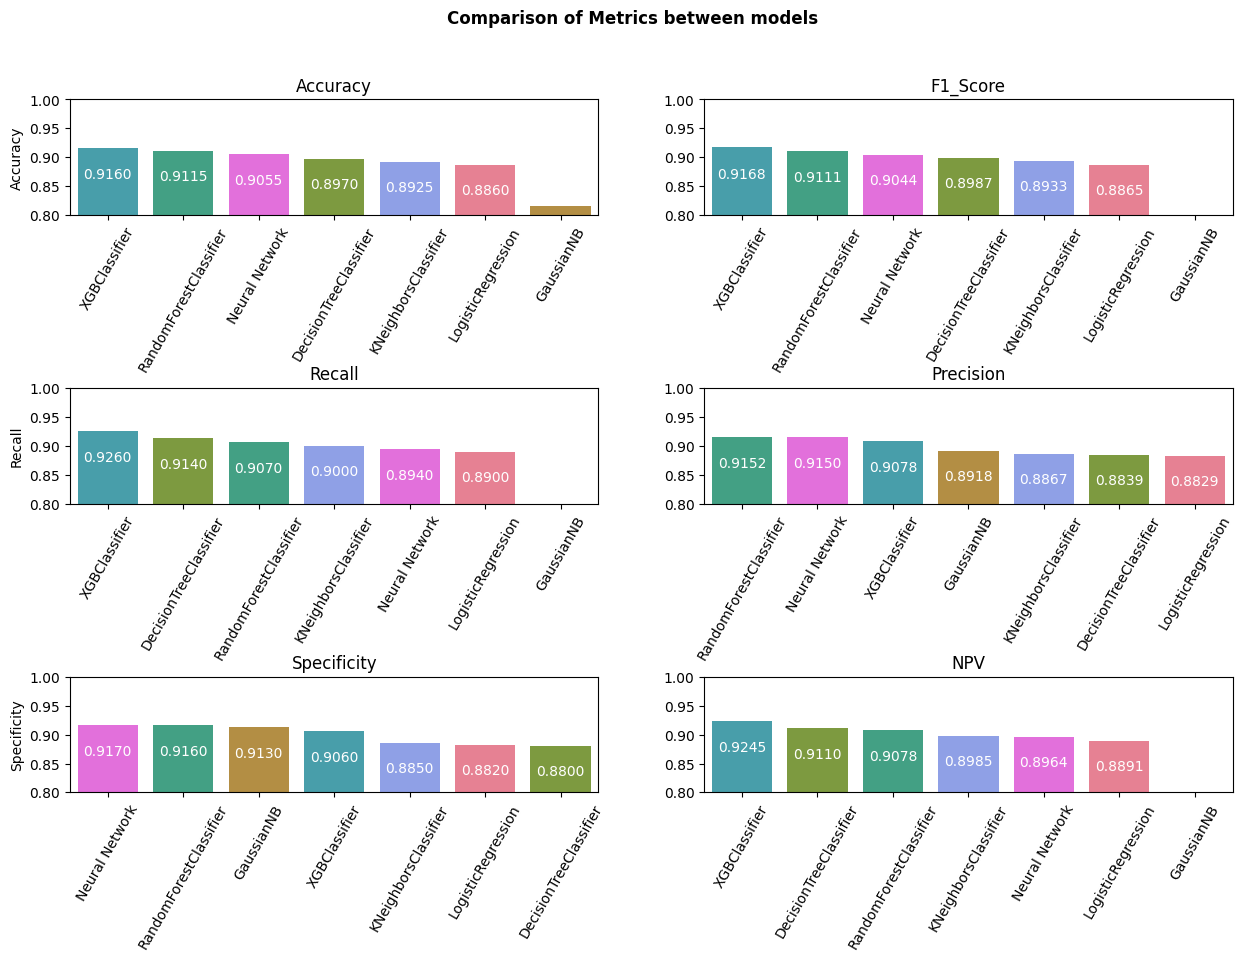

In [53]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
cols = resultsDF.columns[2:8]
num_classifiers = len(resultsDF['Classifier'].unique())
color_palette = sns.color_palette('husl', n_colors=num_classifiers)

classifier_colors = dict(zip(resultsDF['Classifier'].unique(), color_palette))

for i in range(3):
    for j in range(2):
        col = (i * 2) + j
        classifier_order = resultsDF.sort_values(by=cols[col], ascending=False)['Classifier']
        plot = sns.barplot(x='Classifier', y=cols[col], data=resultsDF, ax=ax[i, j],
                           order=classifier_order, palette=[classifier_colors[c] for c in classifier_order])
        
        ax[i, j].set_xlabel('')
        if j > 0:
            ax[i, j].set_ylabel('')
        ax[i, j].set_title(cols[col])
        ax[i, j].tick_params(axis='x', labelrotation=60)
        ax[i, j].set_ylim(0.8, 1.0)

        for p in plot.patches:
            plot.annotate(format(p.get_height(), '.4f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()-(p.get_height()*0.05)), 
                          ha='center', va='center',color='white')

fig.suptitle("Comparison of Metrics between models", fontweight='bold')
fig.subplots_adjust(hspace=1.5)
plt.show()

In [36]:
resultsDF.iloc[4]['Best_Params']

"{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}"

In [45]:
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE

model=XGBClassifier(colsample_bytree=0.8,learning_rate=0.1,max_depth=5,n_estimators=100,subsample=1.0)

sampling=SMOTE(sampling_strategy=1,random_state=42)

pipeOver=imbPipeline([('preprocessor', preprocessor),('sampling', sampling),('model',model)])

x=df.drop('diabetes',axis=1)

y=df['diabetes']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, shuffle=True,stratify=y,test_size=0.2,random_state=42)

pipeOver.fit(xTrain,yTrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'hypertension', 'heart_disease', 'smoking_history'], dtype='object'))]))...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [46]:
preds=pipeOver.predict(xTest)

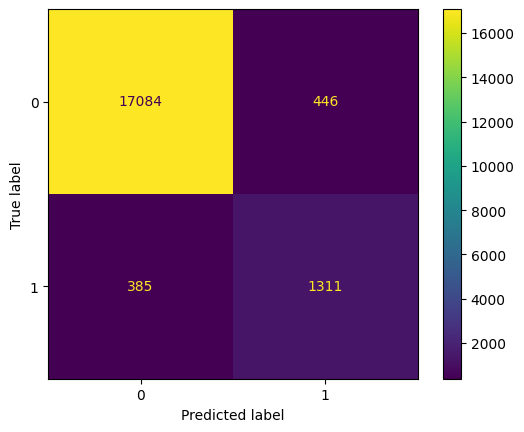

Accuracy: 0.9567772807656298
F1 Score: 0.7593397046046915
Recall: 0.7729952830188679
Precision: 0.7461582242458736
Specificity: 0.9745579007415859
Negative Predictive Value: 0.9779609594138188


In [47]:
accuracy = accuracy_score(yTest, preds)
recall = recall_score(yTest, preds)
precision = precision_score(yTest, preds)
f1 = f1_score(yTest, preds)

tn, fp, fn, tp = confusion_matrix(yTest, preds).ravel()

specificity = tn / (tn + fp)
npv = tn / (tn + fn)

cm = confusion_matrix(yTest, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Specificity: {specificity}")
print(f"Negative Predictive Value: {npv}")

In [48]:
from imblearn.under_sampling import RandomUnderSampler

model=XGBClassifier(colsample_bytree=0.8,learning_rate=0.1,max_depth=5,n_estimators=100,subsample=1.0)

sampling=RandomUnderSampler(sampling_strategy=1,random_state=42)

pipeUnder=imbPipeline([('preprocessor', preprocessor),('sampling', sampling),('model',model)])

x=df.drop('diabetes',axis=1)

y=df['diabetes']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, shuffle=True,stratify=y,test_size=0.2,random_state=42)

pipeUnder.fit(xTrain,yTrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'hypertension', 'heart_disease', 'smoking_history'], dtype='object'))]))...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [49]:
preds=pipeUnder.predict(xTest)

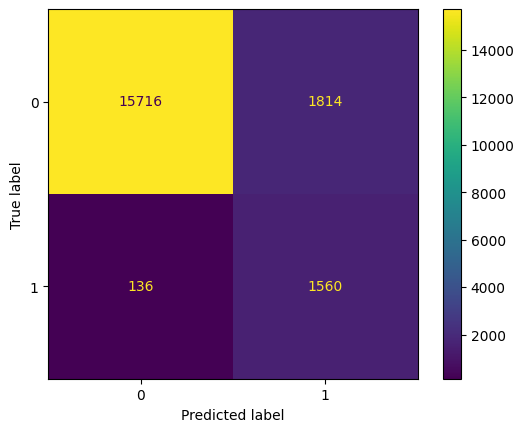

Accuracy: 0.8985748465619474
F1 Score: 0.6153846153846154
Recall: 0.9198113207547169
Precision: 0.46235921754593956
Specificity: 0.8965202509982887
Negative Predictive Value: 0.9914206409285895


In [50]:
accuracy = accuracy_score(yTest, preds)
recall = recall_score(yTest, preds)
precision = precision_score(yTest, preds)
f1 = f1_score(yTest, preds)

tn, fp, fn, tp = confusion_matrix(yTest, preds).ravel()

specificity = tn / (tn + fp)
npv = tn / (tn + fn)

cm = confusion_matrix(yTest, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Specificity: {specificity}")
print(f"Negative Predictive Value: {npv}")

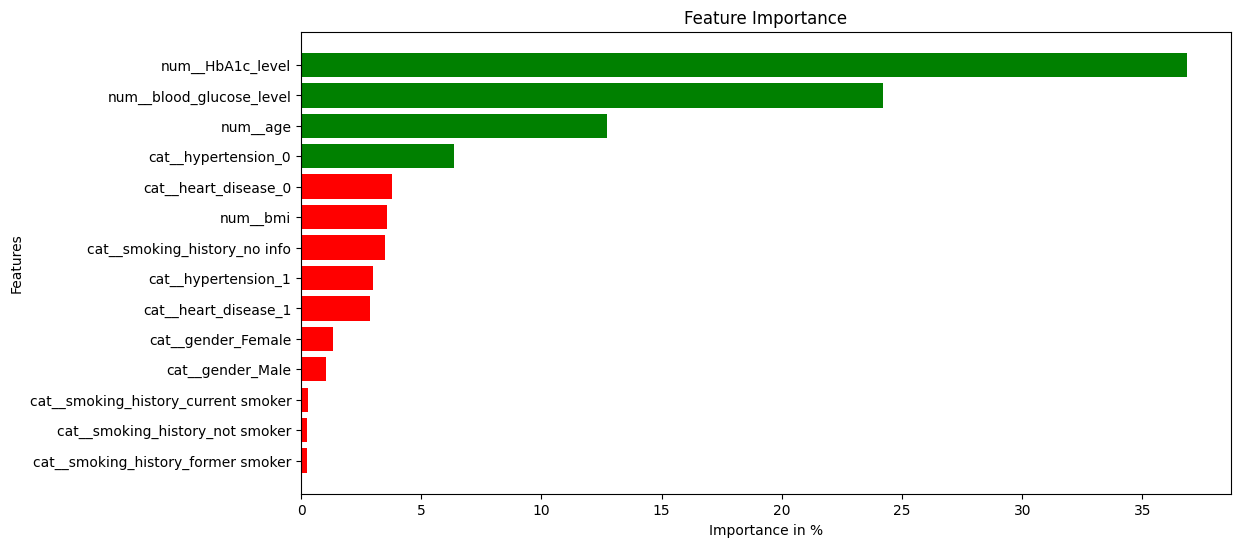

In [51]:
FeatureNames = pipeOver.named_steps['preprocessor'].get_feature_names_out()
Importance = model.feature_importances_ * 100

SortedIndices = Importance.argsort()
SortedImportance = Importance[SortedIndices]
SortedFeatureNames = [FeatureNames[i] for i in SortedIndices]

Colors = ['green' if imp >= 5 else 'red' for imp in SortedImportance]

plt.figure(figsize=(12, 6))
plt.barh(SortedFeatureNames, SortedImportance, color=Colors)
plt.xlabel('Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


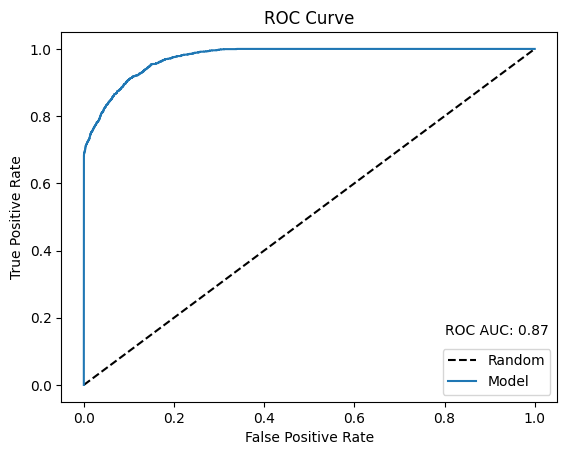

In [52]:
from sklearn.metrics import roc_curve,roc_auc_score

pred = pipeOver.predict_proba(xTest)[:, 1]
fpr, tpr, thresholds = roc_curve(yTest, pred)

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fpr, tpr, label='Model')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

plt.text(0.8, 0.15, 'ROC AUC: {:.2f}'.format(roc_auc_score(yTest,pipeOver.predict(xTest))))

plt.legend(loc='lower right')
plt.show()